In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
items = []
with open("comments.json","r") as fp:
    for line in fp:
        comment = json.loads(line)
        items.append(comment)

In [4]:
item_list = [[item['pub_time'],item['rating'],item['content']] for item in items]
comment_df = pd.DataFrame(item_list,columns=['pub_time','rating','content'])
comment_df['pub_time'] = pd.to_datetime(comment_df['pub_time'])
comment_df.head()

,pub_time,rating,content
0,2020-12-01 20:43:49,5,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...
1,2020-12-01 21:00:00,3,比大秦帝国，差点儿意思。
2,2020-12-01 21:04:12,4,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开]
3,2020-12-01 20:53:47,2,挖坟翻拍，靡费甚巨（服化道），78×45分钟拖沓，价值何在？加1星给段奕宏。
4,2020-12-02 21:19:00,4,道服化好用心，演员除开赵姬都很给力，就不明白一点，张鲁一长相气质完全没有嬴政的feel，目前...


In [5]:
comment_df["pub_time"].min(),comment_df["pub_time"].max()

(Timestamp('2020-12-01 20:36:07'), Timestamp('2020-12-10 22:06:15'))

Text(0, 0.5, '评论数量')

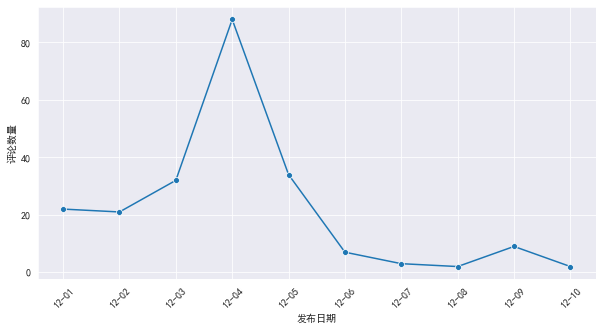

In [6]:
# 分析评论日期
import re
from matplotlib import dates

plt.figure(figsize=(10,5))

# 2. 添加一个新的pub_date
comment_df['pub_date'] = comment_df['pub_time'].dt.date
# # 3. 根据日期分组绘图
comment_date_df = comment_df.groupby(['pub_date']).count()
ax = sns.lineplot(x=comment_date_df.index,y=comment_date_df.content,marker='o')
# 设置显示所有时间
ax.set(xticks=comment_date_df.index)
# 设置x轴旋转
_ = ax.set_xticklabels(comment_date_df.index,rotation=45)
# 设置x轴格式
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d"))
ax.set_xlabel("发布日期")
ax.set_ylabel("评论数量")

Text(0, 0.5, '发布数量')

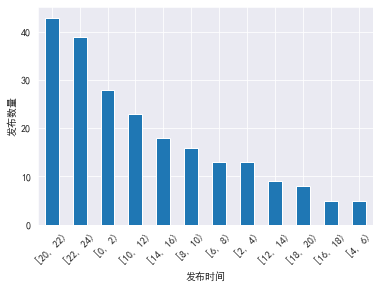

In [7]:
# 分析评论时间
import datetime
time_range = [0,2,4,6,8,10,12,14,16,18,20,22,24]
comment_time_df = comment_df['pub_time'].dt.hour
time_range_counts = pd.cut(comment_time_df,bins=time_range,include_lowest=True,right=False).value_counts()
ax = time_range_counts.plot(kind="bar")
_ = ax.set_xticklabels(labels=time_range_counts.index,rotation=45)
ax.set_xlabel("发布时间")
ax.set_ylabel("发布数量")

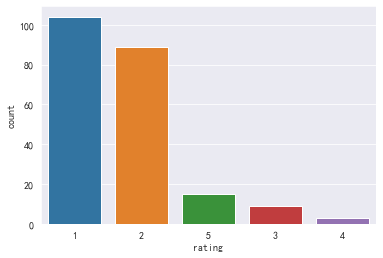

In [8]:
# 评论数据
sns.countplot(x='rating',data=comment_df,order=comment_df['rating'].value_counts().index)

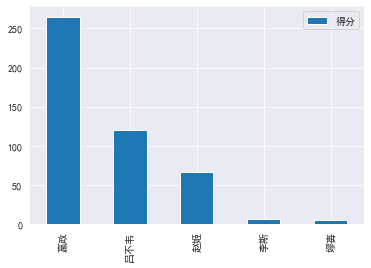

In [18]:
# 电视剧人物的评分
# 力荐：+5，推荐：+4，还行：3，较差：2，很差：1
import jieba
roles = {'嬴政':0,'秦始皇':0,'张鲁一':0,'吕不韦':0,'段奕宏':0,'李斯':0,'嫪毐':0,"赵姬":0,"朱珠":0}
role_names = list(roles.keys())
for name in role_names:
    jieba.add_word(name)
for row in comment_df.index:
    rating = comment_df.loc[row,'rating']
    if rating:
        content = comment_df.loc[row,"content"]
        words = list(jieba.cut(content, cut_all=False))
        names = set(role_names).intersection(set(words))
        for name in names:
            roles[name] += int(rating)
roles['嬴政'] += roles['嬴政'] + roles['秦始皇'] + roles['张鲁一']
roles['吕不韦'] += roles['吕不韦'] + roles['段奕宏']
roles['李斯'] += roles['李斯']
roles['赵姬'] += roles['赵姬'] + roles['朱珠']

roles.pop("秦始皇")
roles.pop("张鲁一")
roles.pop("段奕宏")
roles.pop("朱珠")

role_df = pd.DataFrame(list(roles.values()),index=list(roles.keys()),columns=['得分'])
role_df.sort_values('得分',inplace=True,ascending=False)
role_df.plot(kind='bar')